In [35]:
import sys
sys.path.append('../src') 
from political_ads.preprocessor import Preprocessor

preprocess = Preprocessor()
data = preprocess.file_to_df("..\\data\\all_politicians_aggregated_final.txt")

In [36]:
import pandas as pd 
grpd = data.groupby(["ad_creation_time"]).agg(
    no_ads = ('id', 'count')
).reset_index()

# grpd.plot(grpd["ad_creation_time"], grpd["no_ads"])
grpd[grpd["ad_creation_time"] < pd.Timestamp('2018-05-01 00:00:00')]["no_ads"].sum()


692

In [37]:
from political_ads.grouper import Grouper
from political_ads.visualizer import Visualizer

grouper = Grouper()
viz = Visualizer()

republicans = grouper.group_ads_by_party_by_day(data, "Republican")
democrats = grouper.group_ads_by_party_by_day(data, "Democrat")

In [38]:
from political_ads.keyword_filter import Filter

filter = Filter()

climate_ads = filter.get_climate_ads(data) 
non_climate_ads = data[data.apply(lambda x: filter.check_for_NON_climate_ad(str(x["ad_creative_body"])),axis=1)] # returns the rows that return true

In [39]:
republicans_climate = grouper.group_ads_by_party_by_day(climate_ads, "Republican")
democrats_climate = grouper.group_ads_by_party_by_day(climate_ads, "Democrat")

In [40]:
import pandas as pd
congress = pd.read_csv("..\\src\\data_sets\\legislators_fb_info_final.csv") # read congress member info

In [41]:
data

,ad_creation_time,ad_creative_body,spend,impressions,delivery_by_region,demographic_distribution,page_id,page_name,bylines,id,spend_lo,spend_hi,impressions_lo,impressions_hi
0,2021-10-14,To show that you're part of our fight to prote...,1749.5,74999.5,"[{'percentage': '0.004793', 'region': 'Alabama...","[{'percentage': '0.010689', 'age': '18-24', 'g...",38471053686,Elizabeth Warren,"WARREN DEMOCRATS, INC.",195916456012328,1500,1999,70000,79999
1,2021-10-14,Nothing is spookier than the ongoing assault o...,149.5,27499.5,"[{'percentage': '0.005051', 'region': 'Alabama...","[{'percentage': '0.000629', 'age': '18-24', 'g...",38471053686,Elizabeth Warren,"WARREN DEMOCRATS, INC.",197833945796073,100,199,25000,29999
2,2021-10-14,To show that you're part of our fight to prote...,1749.5,162499.5,"[{'percentage': '0.004873', 'region': 'Alabama...","[{'percentage': '0.005081', 'age': '18-24', 'g...",38471053686,Elizabeth Warren,"WARREN DEMOCRATS, INC.",396978045241497,1500,1999,150000,174999
3,2021-10-14,To show that you're part of our fight to prote...,1749.5,64999.5,"[{'percentage': '0.005017', 'region': 'Alabama...","[{'percentage': '0.000233', 'age': '18-24', 'g...",38471053686,Elizabeth Warren,"WARREN DEMOCRATS, INC.",403080218132713,1500,1999,60000,69999
4,2021-10-14,Nothing is spookier than the ongoing assault o...,149.5,8499.5,"[{'percentage': '0.000315', 'region': 'South D...","[{'percentage': '0.005707', 'age': '45-54', 'g...",38471053686,Elizabeth Warren,"WARREN DEMOCRATS, INC.",419715089547456,100,199,8000,8999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602541,2018-08-30,It’s Mike’s Birthday and he wants a clean plan...,49.5,499.5,"[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.002494', 'age': '18-24', 'g...",174750213023790,"Mike Doyle for PA Representative, 170th District",Friends To Elect Mike Doyle,228443758015782,0,99,0,999
602542,2018-08-30,"Send Mike a ""birthday"" gift for his 41st birth...",49.5,1499.5,"[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.001106', 'age': '18-24', 'g...",174750213023790,"Mike Doyle for PA Representative, 170th District",Friends To Elect Mike Doyle,470785400088043,0,99,1000,1999
602543,2018-08-24,Mike's turning 41! Help him celebrate his birt...,49.5,499.5,"[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.003205', 'age': '18-24', 'g...",174750213023790,"Mike Doyle for PA Representative, 170th District",Friends To Elect Mike Doyle,382470918955364,0,99,0,999
602544,2018-08-22,Hope to see everyone tonight!,49.5,499.5,"[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.066806', 'age': '25-34', 'g...",174750213023790,"Mike Doyle for PA Representative, 170th District",Friends To Elect Mike Doyle,457482704660129,0,99,0,999


In [42]:
non_climate_ads.shape

(583368, 14)

# General characteristics of climate dataset

In [43]:
'''
Of CLIMATE ADS
'''
# Make table that shows no of ads in ranges spend
import numpy as np
import pandas as pd
spend_ranges = climate_ads.groupby(pd.cut(climate_ads["spend_lo"],
    bins=[-np.inf, 99, 499, 999, 4999, 9999, 49999, 99999, np.inf],
)).agg(
    no_ads = ("id", "count")
)
spend_ranges["percentage"] = spend_ranges["no_ads"].apply(lambda x: x/19176)
spend_ranges

,no_ads,percentage
spend_lo,,
"(-inf, 99.0]",16455,0.858104
"(99.0, 499.0]",1940,0.101168
"(499.0, 999.0]",372,0.019399
"(999.0, 4999.0]",339,0.017678
"(4999.0, 9999.0]",35,0.001825
"(9999.0, 49999.0]",34,0.001773
"(49999.0, 99999.0]",1,0.000052
"(99999.0, inf]",0,0.000000


In [44]:
'''
Of CLIMATE ADS
'''
impression_ranges = climate_ads.groupby(pd.cut(climate_ads["impressions_lo"],
    bins=[-np.inf, 999, 4999, 9999, 49999, 99999, 499999, 999999, np.inf],
)).agg(
    no_ads = ("id", "count")
)
impression_ranges["percentage"] = impression_ranges["no_ads"].apply(lambda x: x/19176)
impression_ranges

,no_ads,percentage
impressions_lo,,
"(-inf, 999.0]",12909,0.673185
"(999.0, 4999.0]",3681,0.191959
"(4999.0, 9999.0]",953,0.049698
"(9999.0, 49999.0]",1251,0.065238
"(49999.0, 99999.0]",199,0.010378
"(99999.0, 499999.0]",160,0.008344
"(499999.0, 999999.0]",15,0.000782
"(999999.0, inf]",8,0.000417


In [45]:
'''
Of NON CLIMATE ADS
'''
# Make table that shows no of ads in ranges spend
import numpy as np
import pandas as pd
ALL_ads_spend_ranges = non_climate_ads.groupby(pd.cut(non_climate_ads["spend_lo"],
    bins=[-np.inf, 99, 499, 999, 4999, 9999, 49999, 99999, np.inf],
)).agg(
    no_ads = ("id", "count")
)
ALL_ads_spend_ranges["percentage"] = ALL_ads_spend_ranges["no_ads"].apply(lambda x: x/583368)
ALL_ads_spend_ranges

,no_ads,percentage
spend_lo,,
"(-inf, 99.0]",443869,0.760873
"(99.0, 499.0]",90290,0.154774
"(499.0, 999.0]",21975,0.037669
"(999.0, 4999.0]",22687,0.038890
"(4999.0, 9999.0]",2817,0.004829
"(9999.0, 49999.0]",1615,0.002768
"(49999.0, 99999.0]",94,0.000161
"(99999.0, inf]",21,0.000036


In [46]:
'''
Of NON CLIMATE ADS
'''
ALL_ads_impressions_ranges = non_climate_ads.groupby(pd.cut(non_climate_ads["impressions_lo"],
    bins=[-np.inf, 999, 4999, 9999, 49999, 99999, 499999, 999999, np.inf],
)).agg(
    no_ads = ("id", "count")
)
ALL_ads_impressions_ranges["percentage"] = ALL_ads_impressions_ranges["no_ads"].apply(lambda x: x/583368)
ALL_ads_impressions_ranges

,no_ads,percentage
impressions_lo,,
"(-inf, 999.0]",314993,0.539956
"(999.0, 4999.0]",129169,0.221419
"(4999.0, 9999.0]",43435,0.074456
"(9999.0, 49999.0]",66434,0.113880
"(49999.0, 99999.0]",14638,0.025092
"(99999.0, 499999.0]",12849,0.022026
"(499999.0, 999999.0]",1258,0.002156
"(999999.0, inf]",592,0.001015


# Check distribution of climate ads ratio

In [47]:
# all_climate = grouper.group_ads_by_page(climate_ads)
non_climate = non_climate_ads.groupby("page_id").agg(
     # Aggregate no of ads
            no_ads = ('id', 'count'),
            # Aggregate sum of spend & total impressions generated
            sum_spend_lo = ('spend_lo', 'sum'),
            sum_spend_hi = ('spend_hi', 'sum'),
            median_spend = ('spend', 'median'),
            avg_spend = ('spend', 'sum'),
            sum_impressions_lo = ('impressions_lo', 'sum'),
            sum_impressions_hi = ('impressions_hi', 'sum'),
            # Average number of impressions & spend per ad
            avg_impressions = ('impressions', 'sum')
        ).reset_index()

all_climate = climate_ads.groupby("page_id").agg(
     # Aggregate no of ads
            no_ads = ('id', 'count'),
            # Aggregate sum of spend & total impressions generated
            sum_spend_lo = ('spend_lo', 'sum'),
            sum_spend_hi = ('spend_hi', 'sum'),
            median_spend = ('spend', 'median'),
            avg_spend = ('spend', 'sum'),
            sum_impressions_lo = ('impressions_lo', 'sum'),
            sum_impressions_hi = ('impressions_hi', 'sum'),
            # Average number of impressions & spend per ad
            avg_impressions = ('impressions', 'sum')
        ).reset_index()

In [48]:
import pandas as pd
merged_climate = pd.merge(left=non_climate, right=all_climate, on="page_id", how="inner")

def add_up(x):
    return 100 * (x["no_ads_y"]/(x["no_ads_y"] + x["no_ads_x"]))

merged_climate["climate_ad_ratio"] = merged_climate.apply(lambda x: add_up(x), axis=1)

merged_climate.sort_values(by="climate_ad_ratio", ascending=False)

,page_id,no_ads_x,sum_spend_lo_x,sum_spend_hi_x,median_spend_x,avg_spend_x,sum_impressions_lo_x,sum_impressions_hi_x,avg_impressions_x,no_ads_y,sum_spend_lo_y,sum_spend_hi_y,median_spend_y,avg_spend_y,sum_impressions_lo_y,sum_impressions_hi_y,avg_impressions_y,climate_ad_ratio
111,58080781287,22,300,2478,49.5,1389.0,28000,53978,40989.0,50,6900,12650,49.5,9775.0,218000,288950,253475.0,69.444444
39,1667702233477156,72,26400,38028,49.5,32214.0,1955000,2361928,2158464.0,49,10400,16051,49.5,13225.5,482000,600951,541475.5,40.495868
134,7801901317,135,48400,70665,49.5,59532.5,3781000,4517865,4149432.5,80,3900,12220,49.5,8060.0,48000,135920,91960.0,37.209302
88,344330745672593,78,9400,17922,49.5,13661.0,331000,468922,399961.0,44,1500,5856,49.5,3678.0,38000,85956,61978.0,36.065574
62,211797415586435,9,1500,2791,149.5,2145.5,141000,166991,153995.5,3,1400,1697,649.5,1548.5,122000,142997,132498.5,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,1012679305536045,614,256800,365386,149.5,311093.0,15936000,19194386,17565193.0,1,1000,1499,1249.5,1249.5,100000,124999,112499.5,0.162602
126,6817812700,678,181700,276122,49.5,228911.0,12006000,14650322,13328161.0,1,200,299,249.5,249.5,15000,19999,17499.5,0.147275
110,57495285387,9110,918400,1932390,49.5,1425395.0,29436000,42712890,36074445.0,13,2600,4287,149.5,3443.5,37000,53987,45493.5,0.142497
106,485980975070908,1608,397200,617092,49.5,507146.0,21127000,26068392,23597696.0,2,400,598,249.5,499.0,20000,29998,24999.0,0.124224


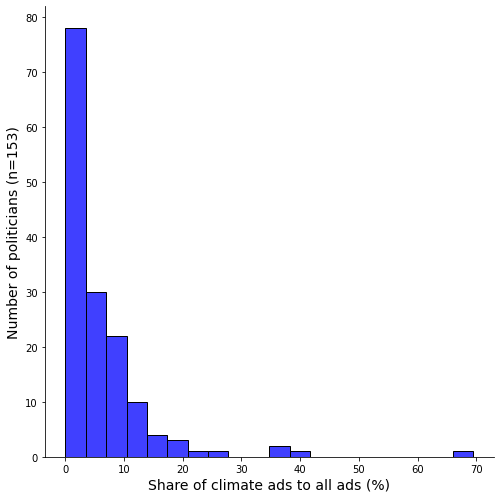

'\nNote: There are only 153 politicians that post about climate. Only those are considered!\n'

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.displot(data=merged_climate["climate_ad_ratio"], kde=False, color='blue', bins=20, height=7, aspect=1)

plt.ylabel("Number of politicians (n=153)", fontsize=14)
plt.xlabel("Share of climate ads to all ads (%)", fontsize=14)

plt.savefig("..\\plots\\ad_distribution.pdf")
plt.show()

'''
Note: There are only 153 politicians that post about climate. Only those are considered!
'''

# Get top spender overall and for climate ads
 

In [71]:
'''
Get pages and their no of ads with the party they belong to
FOR CLIMATE ADS
'''

import seaborn as sns
import matplotlib.pyplot as plt
# PLOT NO OF PEOPLE AND THEIR SHARE OF CLIMATE ADS VS TOTAL ADS

page_all_climate = climate_ads.groupby(["page_name", "page_id"]).agg(
     # Aggregate no of ads
            no_ads = ('id', 'count'),
            # Aggregate sum of spend & total impressions generated
            sum_spend_lo = ('spend_lo', 'sum'),
            sum_spend_hi = ('spend_hi', 'sum'),
            median_spend = ('spend', 'median'),
            sum_spend_avg = ('spend', 'sum'),
            avg_spend = ('spend', 'sum'),
            sum_impressions_lo = ('impressions_lo', 'sum'),
            sum_impressions_hi = ('impressions_hi', 'sum'),
            # Average number of impressions & spend per ad
            sum_impressions_avg = ('impressions', 'sum')
        ).reset_index().sort_values(by="no_ads", ascending=False)

congress = pd.read_csv("..\\src\\data_sets\\legislators_fb_info_final.csv") # read congress member info
        # Check if available
page_all_climate["party"] = page_all_climate["page_id"].apply(lambda x: congress[congress["page_id"] == x]["party"].values[0]) # add party to pages

page_all_climate.sort_values(by="sum_spend_avg", ascending=False, inplace=True)
page_all_climate[page_all_climate["party"] == "Democrat"]

,page_name,page_id,no_ads,sum_spend_lo,sum_spend_hi,median_spend,sum_spend_avg,avg_spend,sum_impressions_lo,sum_impressions_hi,sum_impressions_avg,party
127,Reverend Raphael Warnock,109111900634787,171,388900,501629,249.5,445264.5,445264.5,13770000,15748831,14759415.5,Democrat
6,Alexandria Ocasio-Cortez,1316372698453411,3303,166600,519297,49.5,342948.5,342948.5,9969000,14703697,12336348.5,Democrat
84,John W. Hickenlooper,97493741436,768,179200,287432,49.5,233316.0,233316.0,7211000,9167232,8189116.0,Democrat
134,Sean Casten for Congress,1934158976830122,155,178700,223645,49.5,201172.5,201172.5,5545000,5959849,5752424.5,Democrat
58,Elizabeth Warren,38471053686,1209,101300,239191,49.5,170245.5,170245.5,7581000,9746792,8663896.0,Democrat
...,...,...,...,...,...,...,...,...,...,...,...,...
45,David Scott for Congress,159817223047,2,0,198,49.5,99.0,99.0,5000,6998,5999.0,Democrat
113,Mondaire Jones,2382869555319923,2,0,198,49.5,99.0,99.0,17000,22998,19999.0,Democrat
149,Teresa Leger Fernandez,301228420816284,2,0,198,49.5,99.0,99.0,0,1998,999.0,Democrat
77,Jim Himes,7530258205,1,0,99,49.5,49.5,49.5,15000,19999,17499.5,Democrat


In [70]:
'''
Get pages and their no of ads with the party they belong to
FOR ALL ADS
'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# PLOT NO OF PEOPLE AND THEIR SHARE OF CLIMATE ADS VS TOTAL ADS

page_all = data.groupby(["page_name", "page_id"]).agg(
     # Aggregate no of ads
            no_ads = ('id', 'count'),
            # Aggregate sum of spend & total impressions generated
            sum_spend_lo = ('spend_lo', 'sum'),
            sum_spend_hi = ('spend_hi', 'sum'),
            median_spend = ('spend', 'median'),
            sum_spend_avg = ('spend', 'sum'),
            sum_impressions_lo = ('impressions_lo', 'sum'),
            sum_impressions_hi = ('impressions_hi', 'sum'),
            # Average number of impressions & spend per ad
            sum_impressions_avg = ('impressions', 'sum')
        ).reset_index().sort_values(by="no_ads", ascending=False)

congress = pd.read_csv("..\\src\\data_sets\\legislators_fb_info_final.csv") # read congress member info
        # Check if available
page_all["party"] = page_all["page_id"].apply(lambda x: congress[congress["page_id"] == x]["party"].values[0] if congress["page_id"].str.contains(x).any() else "not_available") # add party to pages


In [52]:
pages_by_party = page_all.groupby(["page_id", "party"]).agg(
    no_ads = ("no_ads", "sum")
).reset_index()

In [53]:
pages_by_party[pages_by_party["party"] == "Independent"]

,page_id,party,no_ads
77,124955570892789,Independent,70411
329,344010372303511,Independent,737


In [54]:
'''
Function for nice axis dollar formatting
'''
sns.set(font_scale=1.4)

def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

In [55]:
page_all_climate

,page_name,page_id,no_ads,sum_spend_lo,sum_spend_hi,median_spend,avg_spend,sum_impressions_lo,sum_impressions_hi,avg_impressions,party
6,Alexandria Ocasio-Cortez,1316372698453411,3303,166600,519297,49.5,342948.5,9969000,14703697,12336348.5,Democrat
127,Reverend Raphael Warnock,109111900634787,171,388900,501629,249.5,445264.5,13770000,15748831,14759415.5,Democrat
16,Bernie Sanders,124955570892789,2808,173600,470092,49.5,321846.0,16825000,22222192,19523596.0,Independent
84,John W. Hickenlooper,97493741436,768,179200,287432,49.5,233316.0,7211000,9167232,8189116.0,Democrat
23,Captain Mark Kelly,163148530407080,1564,84000,246936,49.5,165468.0,2839000,4736436,3787718.0,Democrat
...,...,...,...,...,...,...,...,...,...,...,...
76,Jim Banks,119953292796,2,0,198,49.5,99.0,17000,22998,19999.0,Republican
149,Teresa Leger Fernandez,301228420816284,2,0,198,49.5,99.0,0,1998,999.0,Democrat
45,David Scott for Congress,159817223047,2,0,198,49.5,99.0,5000,6998,5999.0,Democrat
77,Jim Himes,7530258205,1,0,99,49.5,49.5,15000,19999,17499.5,Democrat


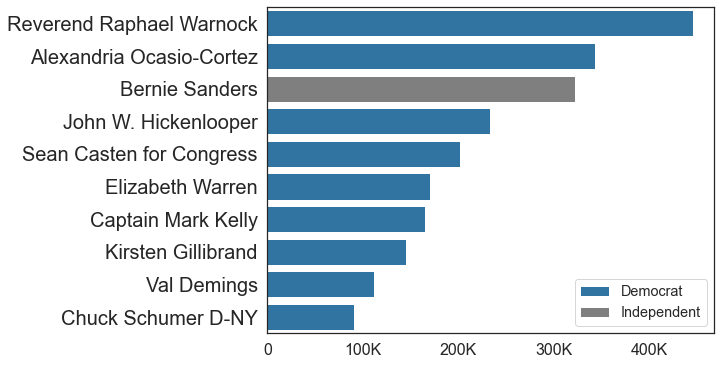

In [107]:
'''
Climate advertisers SPEND
'''
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

page_all_climate.sort_values(by="sum_spend_avg", ascending=False, inplace=True)

# Plot the result
sns.set_theme(style="white")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

palette = {"Democrat":"tab:blue",
           "Republican":"tab:red", 
           "Independent":"tab:grey"}
# Plot the scores
# sns.set_color_codes("pastel")
sns.barplot(x=page_all_climate[:10]["sum_spend_avg"], y=page_all_climate[:10]["page_name"],
             color="b", hue=page_all_climate[:10]["party"], palette=palette, dodge=False)
f.suptitle("")
# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=True, fontsize="large")
# ax.set(xlim=(3.9, 4.3), ylabel="",
#        xlabel="")
plt.yticks(fontsize=20)
plt.xticks(fontsize=16)
plt.xlabel("")
plt.ylabel("")

ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

f.savefig("..\\plots\\top politicians\\top_CLIMATE_advertisers_by_spend.pdf", bbox_inches="tight")

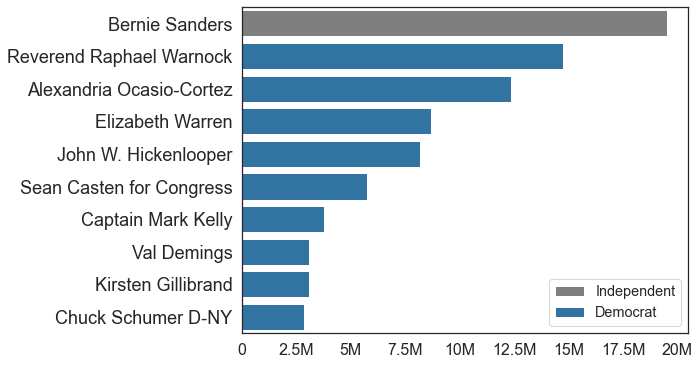

In [102]:
'''
Climate advertisers IMPRESSIONS
'''
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

page_all_climate.sort_values(by="sum_impressions_avg", ascending=False, inplace=True)

# Plot the result
sns.set_theme(style="white")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

palette = {"Democrat":"tab:blue",
           "Republican":"tab:red", 
           "Independent":"tab:grey"}
# Plot the scores
# sns.set_color_codes("pastel")
sns.barplot(x=page_all_climate[:10]["sum_impressions_avg"], y=page_all_climate[:10]["page_name"],
             color="b", hue=page_all_climate[:10]["party"], palette=palette, dodge=False)
f.suptitle("")
# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=True, fontsize="large")
# ax.set(xlim=(3.9, 4.3), ylabel="",
#        xlabel="")
plt.yticks(fontsize=20)
plt.xticks(fontsize=16)
plt.xlabel("")
plt.ylabel("")

ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

f.savefig("..\\plots\\top politicians\\top_CLIMATE_advertisers_by_impressions.pdf", bbox_inches="tight")

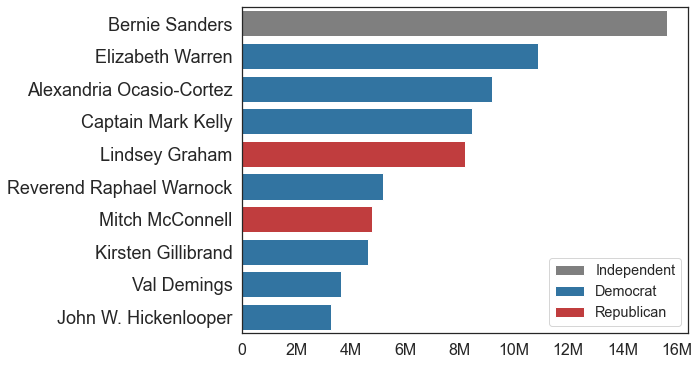

In [103]:
'''
All advertisers SPEND top 10
'''
import matplotlib.ticker as tick
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

page_all.sort_values(by="sum_spend_avg", ascending=False, inplace=True)

# Plot the result
sns.set_theme(style="white")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

palette = {"Democrat":"tab:blue",
           "Republican":"tab:red", 
           "Independent":"tab:grey"}
# Plot the scores
# sns.set_color_codes("pastel")
sns.barplot(x=page_all[:10]["sum_spend_avg"], y=page_all[:10]["page_name"],
             color="b", hue=page_all[:10]["party"], palette=palette, dodge=False)
             
f.suptitle("")
# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=True, fontsize="large")

ax.yaxis.label.set_size(40)

plt.yticks(fontsize=18)
plt.xticks(fontsize=16)
plt.xlabel("")
plt.ylabel("")

ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

f.savefig("..\\plots\\top politicians\\top_OVERALL_advertisers_by_spend.pdf", bbox_inches="tight")

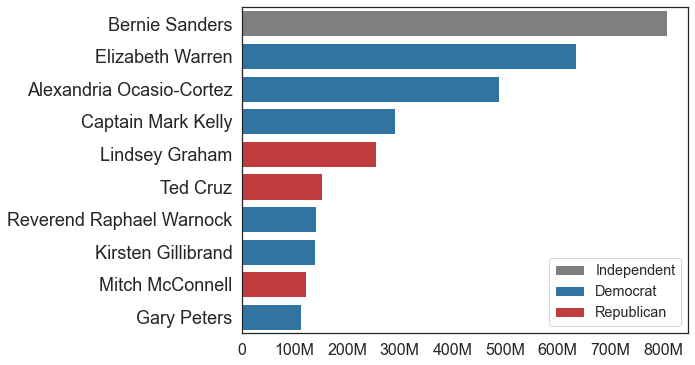

In [105]:
'''
All advertisers Impressions top 10
'''
import matplotlib.ticker as tick
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

page_all.sort_values(by="sum_impressions_avg", ascending=False, inplace=True)

# Plot the result
sns.set_theme(style="white")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

palette = {"Democrat":"tab:blue",
           "Republican":"tab:red", 
           "Independent":"tab:grey"}
# Plot the scores
# sns.set_color_codes("pastel")
sns.barplot(x=page_all[:10]["sum_impressions_avg"], y=page_all[:10]["page_name"],
             color="b", hue=page_all[:10]["party"], palette=palette, dodge=False)
f.suptitle("")
# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=True, fontsize="large")

plt.yticks(fontsize=18)
plt.xticks(fontsize=16)
plt.xlabel("")
plt.ylabel("")

ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

ax.yaxis.label.set_size(50)

f.savefig("..\\plots\\top politicians\\top_OVERALL_advertisers_by_impressions.pdf", bbox_inches="tight")

In [66]:
page_all["party"].value_counts()

Democrat       286
Republican     267
Independent      2
Name: party, dtype: int64

In [67]:
republicans_climate["ad_creation_time"][0]

Timestamp('2018-06-05 00:00:00')

# Time series plots

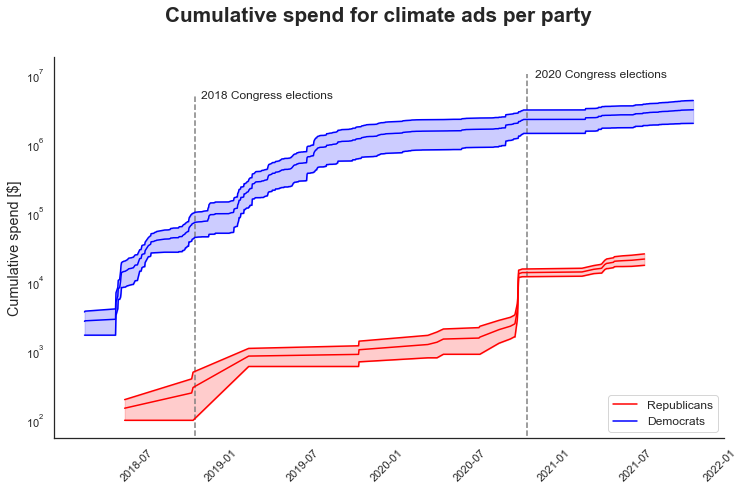

In [68]:
# As input needs dataframe containing the advertisements GROUPED BY DAY!
# Can be done for individual politicians or even groups like reps or dems        # https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
# This graph: https://swdevnotes.com/python/2020/display-line-chart-range/
sns.set_theme(style="white")
import matplotlib.ticker as tick
from datetime import datetime
from matplotlib.pyplot import text


df_1 = republicans_climate
days = df_1.ad_creation_time
lower = df_1.sum_spend_lo.cumsum()
average = df_1.avg_spend.cumsum()
upper = df_1.sum_spend_hi.cumsum()

title = f'Cumulative spend for climate ads per party'

fig, ax1 = plt.subplots(figsize = (12,7))

fig.suptitle(title, fontsize = 'xx-large',  fontweight = 'bold')

ax1.plot(days, upper, label = 'Republicans', color="red")
ax1.plot(days, average, color="red")
ax1.plot(days, lower, color="red")
ax1.set_ylabel('Cumulative spend [$]', fontsize = 'large')
# ax1.set_xlabel('Time', fontsize=14)
        # Hide the right and top spines
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.fill_between(days, lower, upper, alpha=0.2, color="red")

# Second plot
df_2 = democrats_climate
days_2 = df_2.ad_creation_time
lower_2 = df_2.sum_spend_lo.cumsum()
average_2 = df_2.avg_spend.cumsum()
upper_2 = df_2.sum_spend_hi.cumsum()

ax1.plot(days_2, upper_2, label = 'Democrats', color="blue")
ax1.plot(days_2, average_2, color="blue")
ax1.plot(days_2, lower_2,color="blue")
ax1.fill_between(days_2, lower_2, upper_2, alpha=0.2, color="blue")

ax1.legend(
                loc = 'lower right',
                frameon = True,
                fontsize = 'medium')
                
plt.xticks(rotation = 45) # Rotates X-ax1is Ticks by 45-degrees

# ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

#Add vertical lines
plt.vlines(x=pd.Timestamp('2018-11-06 00:00:00'), ymin=0, ymax=5000000, color = 'grey', linestyles="dashed")
text(pd.Timestamp('2018-11-20 00:00:00'), 5000000, "2018 Congress elections", rotation=360, verticalalignment='center')

plt.vlines(x=pd.Timestamp('2020-11-03 00:00:00'), ymin=0, ymax=10000000, color = 'grey', linestyles="dashed")
text(pd.Timestamp('2020-11-20 00:00:00'), 10000000, "2020 Congress elections", rotation=360, verticalalignment='center')


plt.yscale("log")
plt.show()
fig.savefig("..\\plots\\climate_both_spend_inclBernie.pdf")

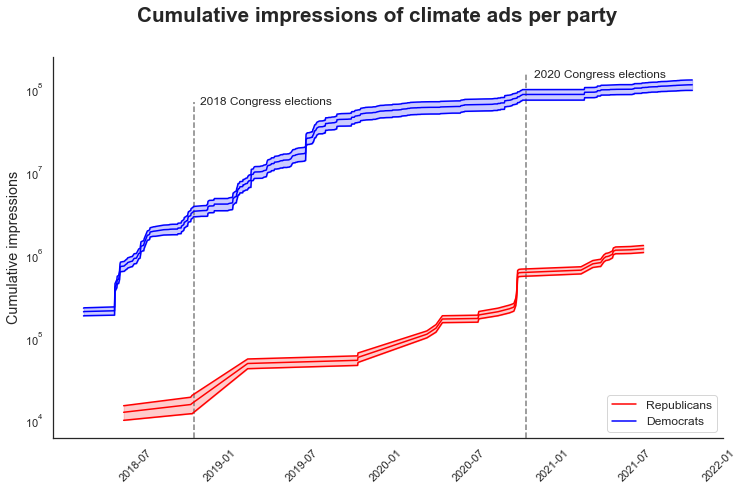

In [69]:
 # https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
        # This graph: https://swdevnotes.com/python/2020/display-line-chart-range/
        # df_c = u5mr_df.loc[([country]), :]
sns.set_theme(style="white")
import matplotlib.ticker as tick
from datetime import datetime
from matplotlib.pyplot import text

df_c = republicans_climate
days = df_c.ad_creation_time
lower = df_c.sum_impressions_lo.cumsum()
average = df_c.avg_impressions.cumsum()
upper = df_c.sum_impressions_hi.cumsum()

title = f'Cumulative impressions of climate ads per party'

fig, ax = plt.subplots(figsize = (12,7))
fig.suptitle(title, fontsize = 'xx-large',  fontweight = 'bold')

ax.plot(days, upper, label = 'Republicans', color="red")
ax.plot(days, average, color="red")
ax.plot(days, lower, color="red")  

ax.set_ylabel('Cumulative impressions', fontsize = 'large')
# ax.set_xlabel('Time', fontsize=14)
        # Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.fill_between(days, lower, upper, alpha=0.2, color="red")


# Second plot
df_2 = democrats_climate
days_2 = df_2.ad_creation_time
lower_2 = df_2.sum_impressions_lo.cumsum()
average_2 = df_2.avg_impressions.cumsum()
upper_2 = df_2.sum_impressions_hi.cumsum()


ax.plot(days_2, upper_2, label = 'Democrats', color="blue")
ax.plot(days_2, average_2, color="blue")
ax.plot(days_2, lower_2,color="blue")
ax.fill_between(days_2, lower_2, upper_2, alpha=0.2, color="blue")

ax.legend(
                loc = 'lower right',
                frameon = True,
                fontsize = 'medium')

plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees

# Add vertical lines
plt.vlines(x=pd.Timestamp('2018-11-06 00:00:00'), ymin=0, ymax=70000000, color = 'grey', linestyles="dashed")
text(pd.Timestamp('2018-11-20 00:00:00'), 70000000, "2018 Congress elections", rotation=360, verticalalignment='center')

plt.vlines(x=pd.Timestamp('2020-11-03 00:00:00'), ymin=0, ymax=150000000, color = 'grey', linestyles="dashed")
text(pd.Timestamp('2020-11-20 00:00:00'), 150000000, "2020 Congress elections", rotation=360, verticalalignment='center')

plt.yscale("log")


plt.show()
fig.savefig("..\\plots\\climate_both_impressions_inclBernie.pdf")

In [70]:
republicans_data = grouper.group_ads_by_party_by_day(data, "Republican")
democrats_data = grouper.group_ads_by_party_by_day(data, "Democrat")
data_day = grouper.group_ads_by_day(data)
'''
Only look at ads from 2018 (some are from 2016...)
'''
republicans_data.drop(republicans_data[republicans_data.ad_creation_time < pd.Timestamp('2018-01-01 00:00:00')].index, inplace=True)
democrats_data.drop(democrats_data[democrats_data.ad_creation_time < pd.Timestamp('2018-01-01 00:00:00')].index, inplace=True)


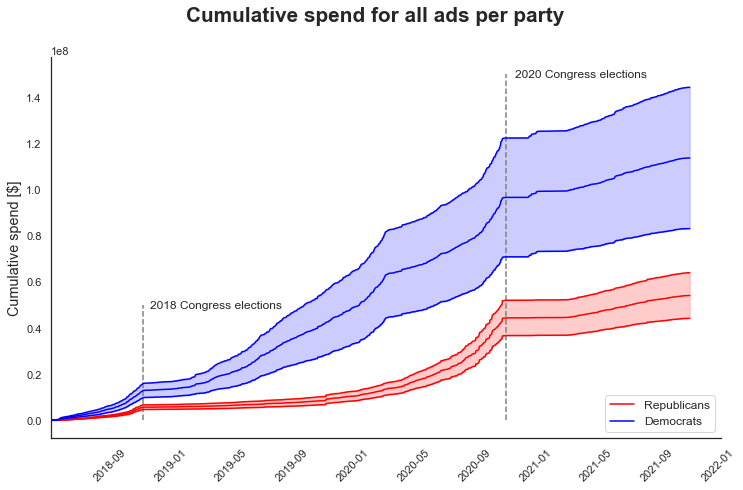

In [71]:
# As input needs dataframe containing the advertisements GROUPED BY DAY!
# Can be done for individual politicians or even groups like reps or dems        # https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
# This graph: https://swdevnotes.com/python/2020/display-line-chart-range/
sns.set_theme(style="white")
import matplotlib.ticker as tick
from datetime import datetime
from matplotlib.pyplot import text


df_1 = republicans_data
days = df_1.ad_creation_time
lower = df_1.sum_spend_lo.cumsum()
average = df_1.avg_spend.cumsum()
upper = df_1.sum_spend_hi.cumsum()

title = f'Cumulative spend for all ads per party'

fig, ax1 = plt.subplots(figsize = (12,7))

fig.suptitle(title, fontsize = 'xx-large',  fontweight = 'bold')

ax1.plot(days, upper, label = 'Republicans', color="red")
ax1.plot(days, average, color="red")
ax1.plot(days, lower, color="red")
ax1.set_ylabel('Cumulative spend [$]', fontsize = 'large')
# ax1.set_xlabel('Time', fontsize=14)
        # Hide the right and top spines
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.fill_between(days, lower, upper, alpha=0.2, color="red")

# Second plot
df_2 = democrats_data
days_2 = df_2.ad_creation_time
lower_2 = df_2.sum_spend_lo.cumsum()
average_2 = df_2.avg_spend.cumsum()
upper_2 = df_2.sum_spend_hi.cumsum()

ax1.plot(days_2, upper_2, label = 'Democrats', color="blue")
ax1.plot(days_2, average_2, color="blue")
ax1.plot(days_2, lower_2,color="blue")
ax1.fill_between(days_2, lower_2, upper_2, alpha=0.2, color="blue")

ax1.legend(
                loc = 'lower right',
                frameon = True,
                fontsize = 'medium')
                
plt.xticks(rotation = 45) # Rotates X-ax1is Ticks by 45-degrees

ax1.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

#Add vertical lines
plt.vlines(x=pd.Timestamp('2018-11-06 00:00:00'), ymin=0, ymax=50000000, color = 'grey', linestyles="dashed")
text(pd.Timestamp('2018-11-20 00:00:00'), 50000000, "2018 Congress elections", rotation=360, verticalalignment='center')

plt.vlines(x=pd.Timestamp('2020-11-03 00:00:00'), ymin=0, ymax=150000000, color = 'grey', linestyles="dashed")
text(pd.Timestamp('2020-11-20 00:00:00'), 150000000, "2020 Congress elections", rotation=360, verticalalignment='center')

ax1.set_xlim([pd.Timestamp('2018-05-06 00:00:00'), pd.Timestamp('2022-01-06 00:00:00')])

plt.yscale("linear")
plt.show()
fig.savefig("..\\plots\\OVERALL_both_spend_inclBernie.pdf")

In [72]:
republicans_data.sort_values(by="ad_creation_time", ascending=True)
democrats_data.sort_values(by="ad_creation_time", ascending=True)
democrats_data["ad_creation_time"][10]

Timestamp('2018-03-09 00:00:00')

# Other


In [73]:
data

,ad_creation_time,ad_creative_body,spend,impressions,delivery_by_region,demographic_distribution,page_id,page_name,bylines,id,spend_lo,spend_hi,impressions_lo,impressions_hi
0,2021-10-14,To show that you're part of our fight to prote...,1749.5,74999.5,"[{'percentage': '0.004793', 'region': 'Alabama...","[{'percentage': '0.010689', 'age': '18-24', 'g...",38471053686,Elizabeth Warren,"WARREN DEMOCRATS, INC.",195916456012328,1500,1999,70000,79999
1,2021-10-14,Nothing is spookier than the ongoing assault o...,149.5,27499.5,"[{'percentage': '0.005051', 'region': 'Alabama...","[{'percentage': '0.000629', 'age': '18-24', 'g...",38471053686,Elizabeth Warren,"WARREN DEMOCRATS, INC.",197833945796073,100,199,25000,29999
2,2021-10-14,To show that you're part of our fight to prote...,1749.5,162499.5,"[{'percentage': '0.004873', 'region': 'Alabama...","[{'percentage': '0.005081', 'age': '18-24', 'g...",38471053686,Elizabeth Warren,"WARREN DEMOCRATS, INC.",396978045241497,1500,1999,150000,174999
3,2021-10-14,To show that you're part of our fight to prote...,1749.5,64999.5,"[{'percentage': '0.005017', 'region': 'Alabama...","[{'percentage': '0.000233', 'age': '18-24', 'g...",38471053686,Elizabeth Warren,"WARREN DEMOCRATS, INC.",403080218132713,1500,1999,60000,69999
4,2021-10-14,Nothing is spookier than the ongoing assault o...,149.5,8499.5,"[{'percentage': '0.000315', 'region': 'South D...","[{'percentage': '0.005707', 'age': '45-54', 'g...",38471053686,Elizabeth Warren,"WARREN DEMOCRATS, INC.",419715089547456,100,199,8000,8999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602541,2018-08-30,It’s Mike’s Birthday and he wants a clean plan...,49.5,499.5,"[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.002494', 'age': '18-24', 'g...",174750213023790,"Mike Doyle for PA Representative, 170th District",Friends To Elect Mike Doyle,228443758015782,0,99,0,999
602542,2018-08-30,"Send Mike a ""birthday"" gift for his 41st birth...",49.5,1499.5,"[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.001106', 'age': '18-24', 'g...",174750213023790,"Mike Doyle for PA Representative, 170th District",Friends To Elect Mike Doyle,470785400088043,0,99,1000,1999
602543,2018-08-24,Mike's turning 41! Help him celebrate his birt...,49.5,499.5,"[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.003205', 'age': '18-24', 'g...",174750213023790,"Mike Doyle for PA Representative, 170th District",Friends To Elect Mike Doyle,382470918955364,0,99,0,999
602544,2018-08-22,Hope to see everyone tonight!,49.5,499.5,"[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.066806', 'age': '25-34', 'g...",174750213023790,"Mike Doyle for PA Representative, 170th District",Friends To Elect Mike Doyle,457482704660129,0,99,0,999
